In [1]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
cd gdrive/MyDrive/

/content/gdrive/MyDrive


In [4]:
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


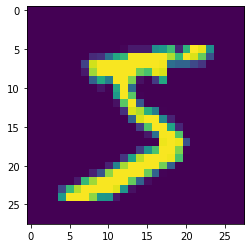

In [5]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0])

In [6]:
X_train[0].shape

(28, 28)

In [7]:
X_train = X_train.reshape(60000,28,28,1)
X_test = X_test.reshape(10000,28,28,1)

In [8]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [10]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten
#create model
model = Sequential()
#add model layers
model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(32, kernel_size=3, activation='relu'))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

In [11]:
#compile model using accuracy to measure model performance
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [12]:
#train the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3)

Epoch 1/3
1875/1875 [==============================] - 162s 86ms/step - loss: 0.2217 - accuracy: 0.9512 - val_loss: 0.1027 - val_accuracy: 0.9694
Epoch 2/3
1875/1875 [==============================] - 169s 90ms/step - loss: 0.0681 - accuracy: 0.9791 - val_loss: 0.0720 - val_accuracy: 0.9807
Epoch 3/3
1875/1875 [==============================] - 164s 88ms/step - loss: 0.0490 - accuracy: 0.9851 - val_loss: 0.0748 - val_accuracy: 0.9798


In [13]:
#predict first 4 images in the test set
model.predict(X_test[:4])

array([[5.0350422e-09, 6.9408726e-15, 4.5032360e-09, 1.1893062e-08,
        2.7303658e-13, 6.8239457e-13, 2.3338646e-17, 1.0000000e+00,
        3.6320353e-11, 9.8110653e-10],
       [6.7134764e-08, 1.2184594e-06, 9.9998426e-01, 9.1265576e-08,
        1.7060174e-12, 1.1260698e-12, 2.5156314e-06, 1.4264295e-15,
        1.1801423e-05, 3.1694340e-14],
       [5.5034411e-07, 9.9920446e-01, 3.5922969e-04, 9.4590348e-08,
        4.3471664e-05, 1.8722794e-04, 9.0416843e-06, 4.5084403e-06,
        1.9139137e-04, 1.0563809e-08],
       [9.9999654e-01, 5.8258801e-12, 4.6464717e-08, 7.8212303e-10,
        4.0396317e-10, 9.1179775e-10, 3.2108558e-06, 5.4771426e-10,
        9.4882253e-08, 1.7237019e-07]], dtype=float32)

In [14]:
#actual results for first 4 images in test set
y_test[:4]

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)